# Fashion-MNIST Classification Project

This project aims to build and compare different deep learning models for classifying images from the Fashion-MNIST dataset. We will explore the impact of increasing model complexity, from a simple Artificial Neural Network (ANN) to more sophisticated Convolutional Neural Networks (CNNs), on performance and efficiency.

**Project Agenda & Steps:**

1.  **Dataset Setup:**
    *   Import necessary libraries.
    *   Load the Fashion-MNIST dataset.
    *   Preprocess the data (normalize and reshape images, one-hot encode labels).
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Define the architecture for each model:
        *   Basic ANN Model
        *   Basic CNN Model
        *   Deeper CNN Model

3.  **Model Training:**
    *   Train each model using the prepared training data.
    *   Implement Early Stopping and Model Checkpointing to optimize training and save the best model weights.

4.  **Model Evaluation:**
    *   Load the best weights for each trained model.
    *   Evaluate each model's performance on the test set using metrics like loss and accuracy.
    *   Visualize the training history (accuracy and loss curves) for comparison.
    *   Generate and visualize confusion matrices to understand model performance on each class.

5.  **Prediction Analysis:**
    *   Use the best performing model (Basic CNN in this case) to make predictions on the test set.
    *   Identify and visualize examples of both correctly and incorrectly classified images to gain insights into model behavior.

**Goal:** To analyze and demonstrate how model complexity influences classification accuracy and efficiency on the Fashion-MNIST dataset.

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  


In [18]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### 1.3) Normalize Data

Scale pixel values from **0–255** to the range **0–1** for faster and more stable training.  

**Example:**  
- Before: a pixel value could be `200`  
- After: `200 / 255 ≈ 0.78`  


In [19]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### 1.4) Reshape Data

Reshape images to **28×28×1** by adding a channel dimension, making them compatible with CNN layers.  

**Example:**  
- Before: `(60000, 28, 28)` → 60,000 grayscale images without channel info  
- After: `(60000, 28, 28, 1)` → channel dimension (`1`) added for CNN input  


In [20]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#### 1.5) One-Hot Encode Labels

Convert class labels (0–9) into **one-hot encoded vectors** with 10 output classes, required for multi-class classification.  

**Example:**  
- Original label: `3`  
- One-hot encoded: `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`  


In [21]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

#### 1.6) Verify Dataset Shapes

Print the shapes of images and labels after preprocessing to confirm everything is in the expected format.  

**Example output:**  
- Training images shape: `(60000, 28, 28, 1)`  
- Testing images shape: `(10000, 28, 28, 1)`  
- Training labels shape: `(60000, 10)`  
- Testing labels shape: `(10000, 10)`  


In [22]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28, 1)
Testing images shape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


### 2. Model Building

#### 2.1) Basic ANN Model

- **Flatten (28×28→784)** → 0 params  
- **Dense (128, ReLU)** → 100,480 params  
- **Dense (64, ReLU)** → 8,256 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~109K  

In [23]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.2) Basic CNN Model

- **Conv2D (32, 3×3) + MaxPool** → 320 params  
- **Conv2D (64, 3×3) + MaxPool** → 18,496 params  
- **Flatten**  
- **Dense (64, ReLU)** → 102,464 params  
- **Dense (10, Softmax)** → 650 params  

**Total params:** ~121K  

In [24]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.3) Deeper CNN Model

- **Conv2D (32, 3×3) + BN + MaxPool + Dropout** → 320 + 64 params  
- **Conv2D (64, 3×3) + BN + MaxPool + Dropout** → 18,496 + 128 params  
- **Conv2D (128, 3×3) + BN + MaxPool + Dropout** → 73,856 + 256 params  
- **Flatten**  
- **Dense (128, ReLU) + BN + Dropout** → 147,584 + 256 params  
- **Dense (10, Softmax)** → 1,290 params  

**Total params:** ~242K  

In [25]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,882 (437.04 KB)

 Trainable params: 111,178 (434.29 KB)

 Non-trainable params: 704 (2.75 KB)

### 3. Train models

#### 3.1) Training ANN Model

- **EarlyStopping**: monitors validation loss, stops if no improvement for 5 epochs, restores best weights.  
- **ModelCheckpoint**: saves best ANN weights (`best_ann_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 0.6850
Epoch 1: val_loss improved from inf to 0.42016, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7620 - loss: 0.6848 - val_accuracy: 0.8522 - val_loss: 0.4202
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 0.3819
Epoch 2: val_loss improved from 0.42016 to 0.39626, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.3819 - val_accuracy: 0.8570 - val_loss: 0.3963
Epoch 3/30
919/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8773 - loss: 0.3332
Epoch 3: val_loss improved from 0.39626 to 0.35874, saving model to best_ann_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8773 - loss: 0.3332 - val_accuracy: 0.8741 - val_loss: 0.3587
Epoch 4/30
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8

#### 3.2) Training Basic CNN Model

- **ModelCheckpoint**: saves best Basic CNN weights (`best_basic_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint

In [27]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7396 - loss: 0.7283
Epoch 1: val_loss improved from inf to 0.37974, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7397 - loss: 0.7280 - val_accuracy: 0.8678 - val_loss: 0.3797
Epoch 2/30
930/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.3449
Epoch 2: val_loss improved from 0.37974 to 0.32996, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8760 - loss: 0.3448 - val_accuracy: 0.8782 - val_loss: 0.3300
Epoch 3/30
924/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8923 - loss: 0.2947
Epoch 3: val_loss improved from 0.32996 to 0.30597, saving model to best_basic_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8923 - loss: 0.2946 - val_accuracy: 0.8888 - val_loss: 0.3060
Epoch 4/30
934/938 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 3.3) Training Deeper CNN Model

- **ModelCheckpoint**: saves best Deeper CNN weights (`best_deeper_cnn_model_weights.weights.h5`) based on validation loss.  
- **Training**:  
  - Epochs: up to 30 (early stopping controls actual run)  
  - Batch size: 64  
  - Validation on test set  
  - Callbacks: EarlyStopping + ModelCheckpoint  

In [28]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6515 - loss: 1.0488
Epoch 1: val_loss improved from inf to 0.46787, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6516 - loss: 1.0485 - val_accuracy: 0.8238 - val_loss: 0.4679
Epoch 2/30
932/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.5166
Epoch 2: val_loss improved from 0.46787 to 0.37657, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8113 - loss: 0.5164 - val_accuracy: 0.8604 - val_loss: 0.3766
Epoch 3/30
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8395 - loss: 0.4413
Epoch 3: val_loss improved from 0.37657 to 0.36212, saving model to best_deeper_cnn_model_weights.weights.h5
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8395 - loss: 0.4413 - val_accuracy: 0.8680 - val_loss: 0.3621
Epoch 4/30
935/938 ━━━━━━━━━━━━━━━━━

### 4. Model Evaluation

#### 4.1) Model Evaluation Code Explanation

Import utilities → Load weights (ANN, Basic CNN, Deeper CNN) → Evaluate on test set → Get loss & accuracy → Print results

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


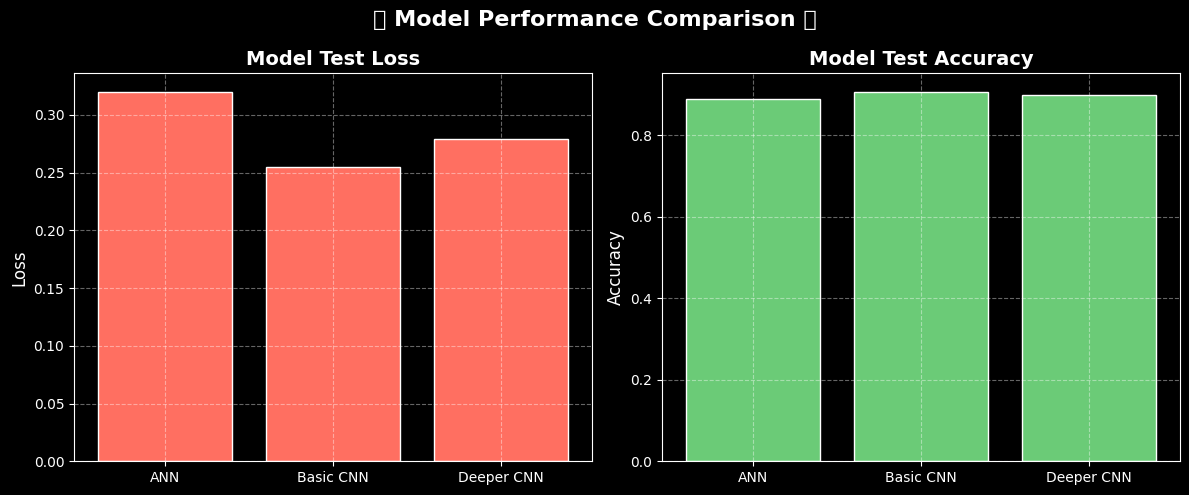

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### 4.2) Model Evaluation (Confusion Matrix & Report)

- Predict test images (ANN, Basic CNN, Deeper CNN)  
- Convert one-hot labels to integers  
- Get predicted labels with `argmax`  
- Print confusion matrix & classification report for each model


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


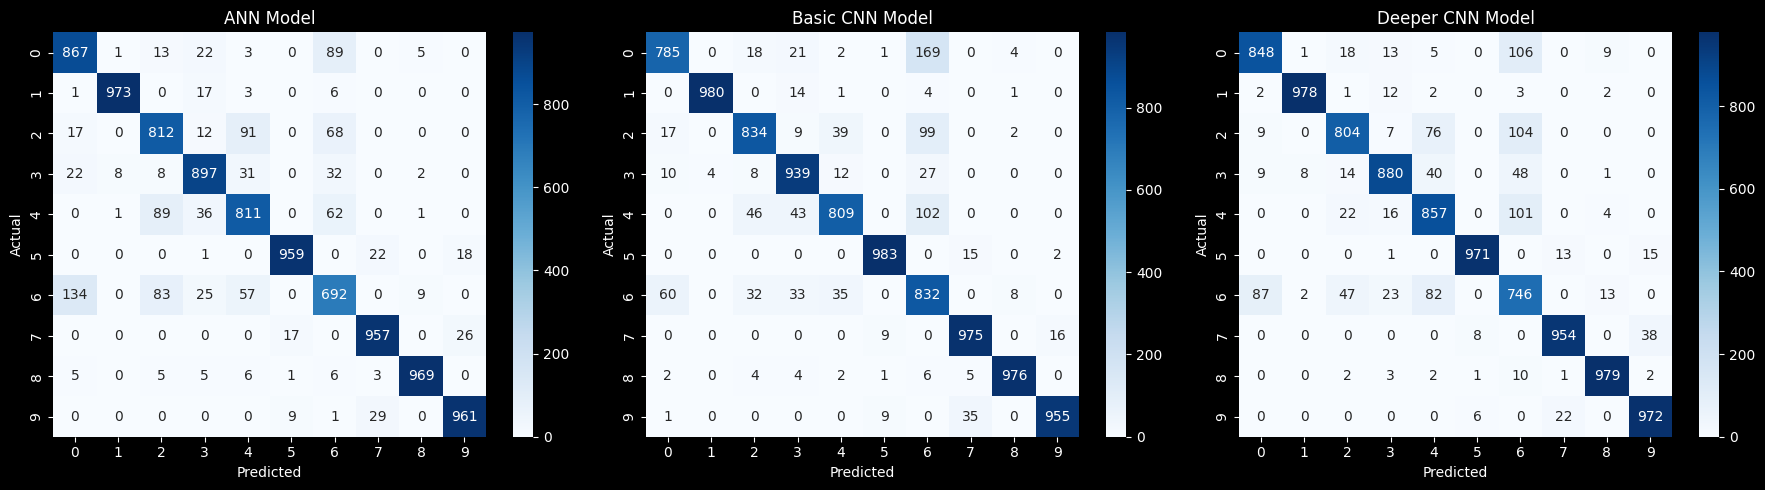

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### 4.3) Model Comparison

- Created a dataframe to store **test loss** and **test accuracy** for ANN, Basic CNN, and Deeper CNN.  
- Plotted training history for each model (accuracy & loss vs. epochs).  
- Helps compare how models learn and generalize over time.  

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

#### 4.4) Predictions

This code:
- Uses the trained **Basic CNN model** to predict on test images.  
- Identifies **correctly** and **incorrectly** classified samples.  
- Randomly selects 100 correct and 100 incorrect predictions.  
- Displays them in a **20×10 grid**:  
  - ✅ Correct predictions → **Green title** (only predicted label).  
  - ❌ Incorrect predictions → **Red title** (Predicted vs True label).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


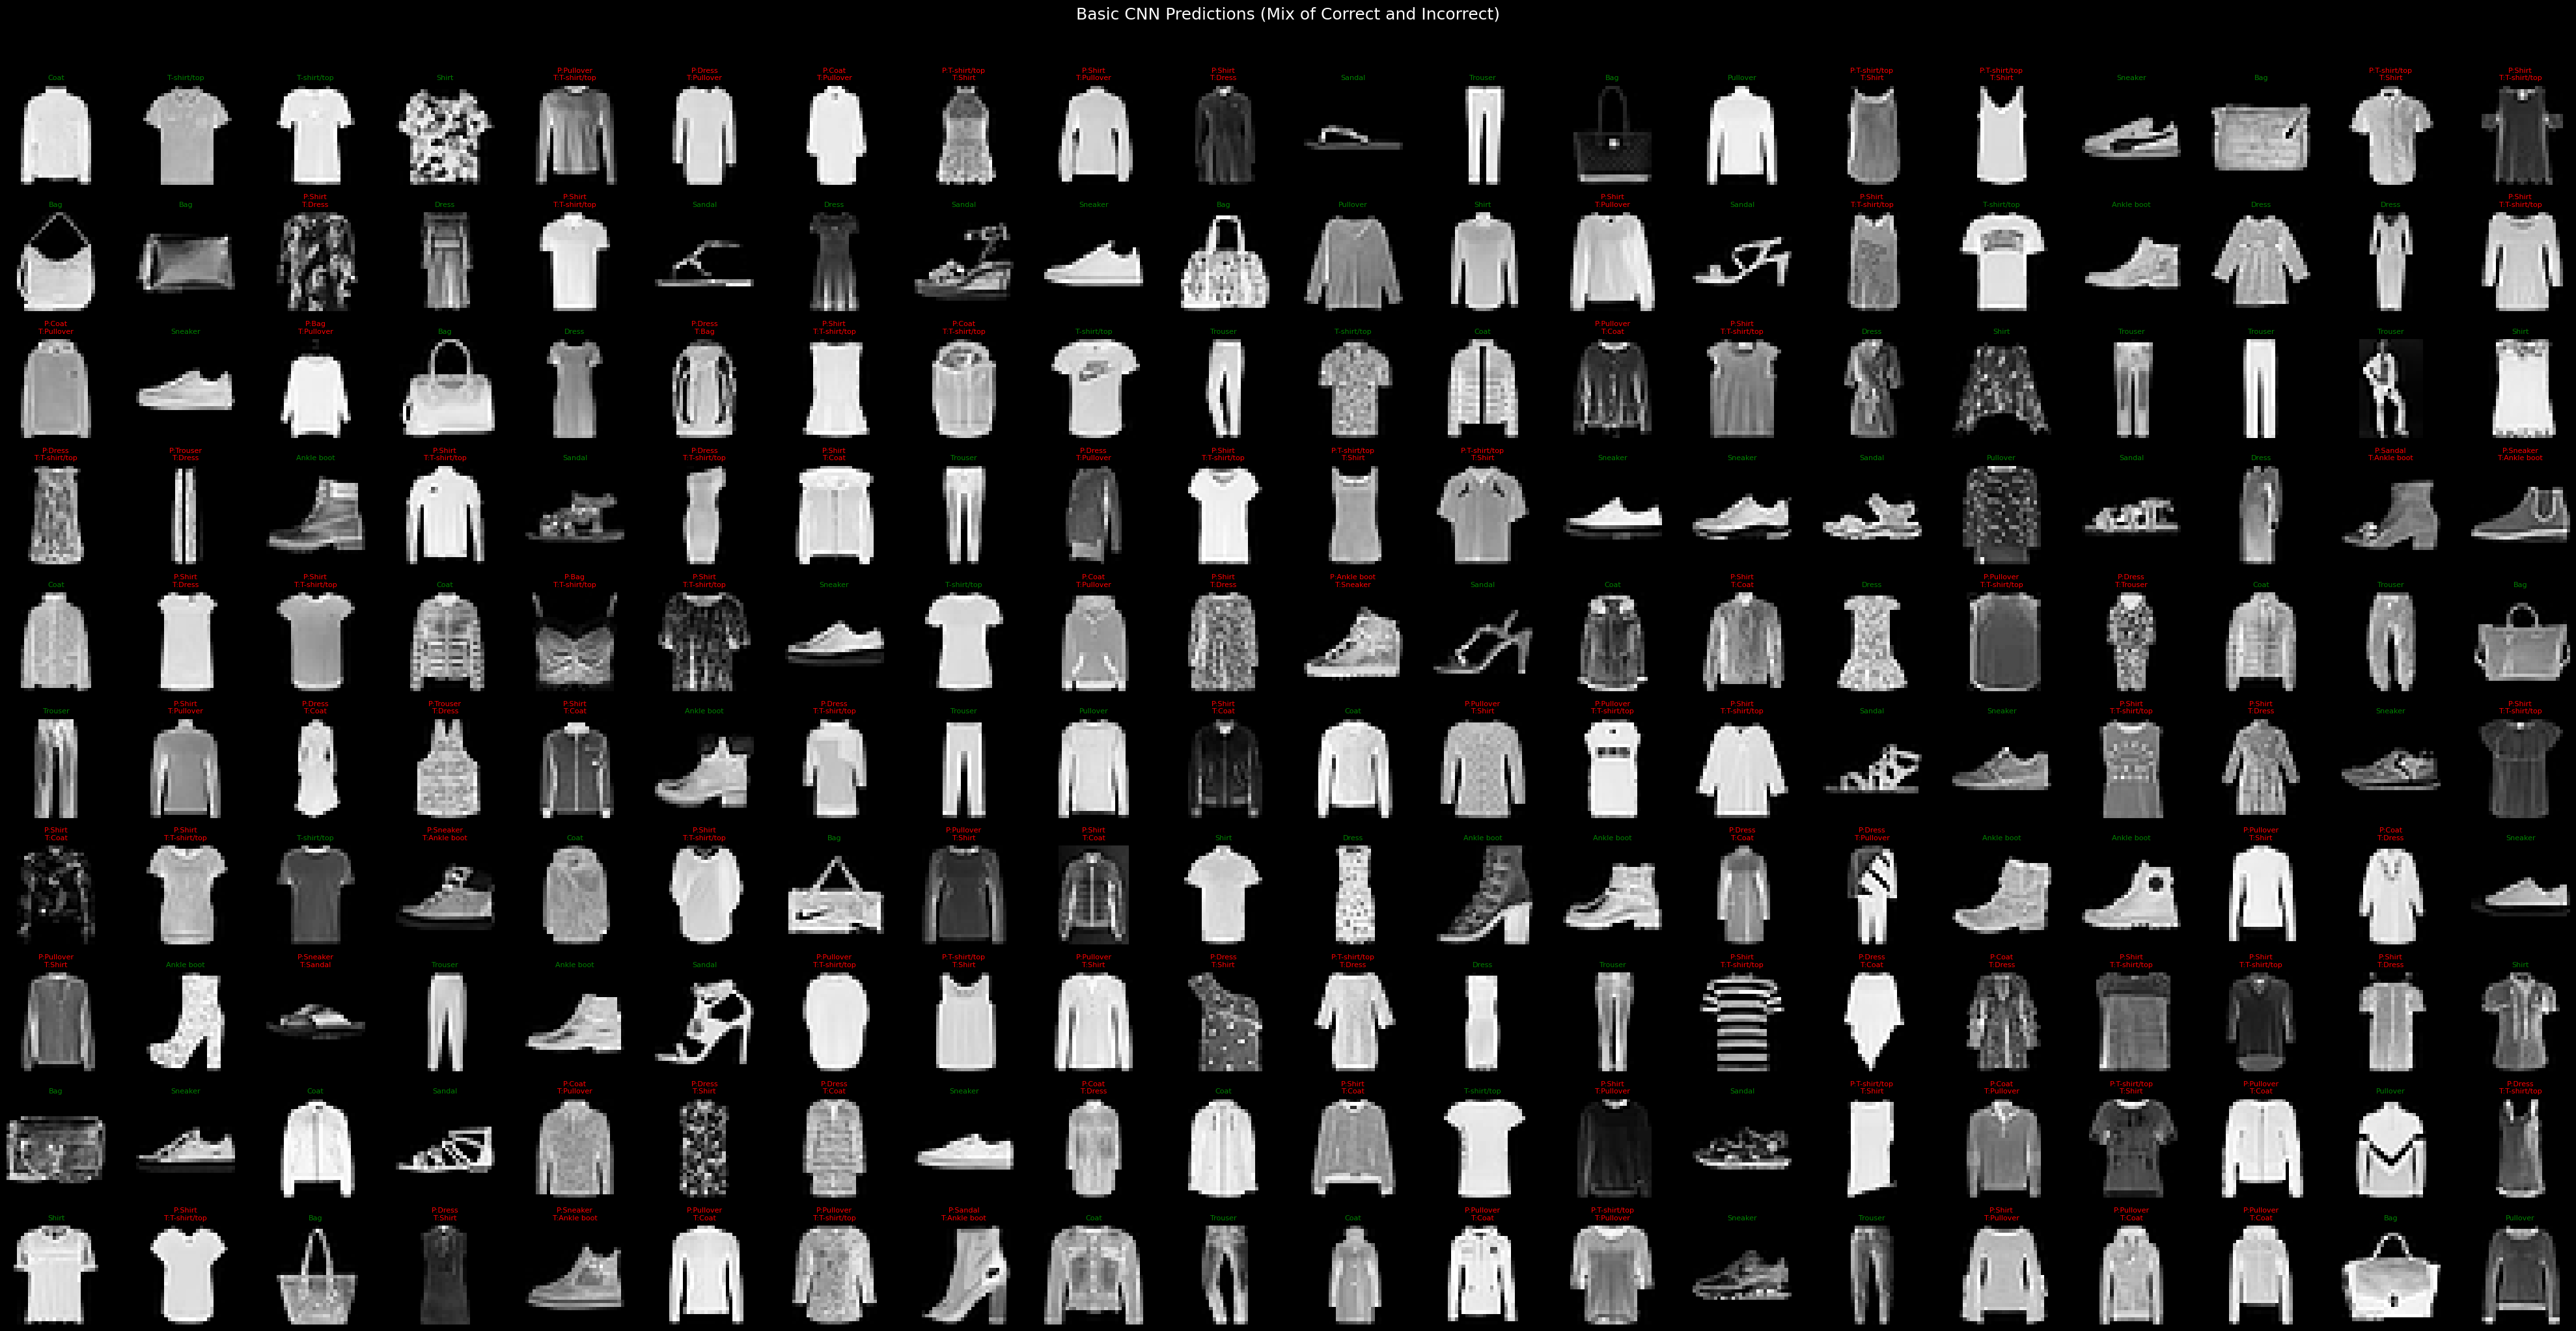

In [32]:
basic_cnn_predictions = basic_cnn_model.predict(test_images)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels)[0]

# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx].reshape(28, 28), cmap='gray')

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels[idx]]

    if basic_cnn_predicted_labels[idx] == test_labels[idx]:
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()

## Project Summary and Conclusion

This project successfully implemented and compared three different deep learning models (ANN, Basic CNN, and Deeper CNN) for classifying images from the Fashion-MNIST dataset.

**Summary of Work:**

1.  **Data Preparation:** The Fashion-MNIST dataset was loaded, normalized, reshaped, and one-hot encoded, preparing it for use with the different model architectures.
2.  **Model Development:** Three models of increasing complexity were defined: a basic Artificial Neural Network (ANN), a basic Convolutional Neural Network (CNN), and a deeper CNN with additional layers, batch normalization, and dropout.
3.  **Model Training:** Each model was trained using the preprocessed training data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights based on validation loss.
4.  **Model Evaluation:** The trained models were evaluated on the test set. Performance metrics (loss and accuracy) were calculated, and the training history was visualized. Confusion matrices were generated to analyze class-specific performance.
5.  **Prediction Analysis:** Predictions were made using the Basic CNN model, and examples of correctly and incorrectly classified images were visualized to gain insights into the model's strengths and weaknesses.

**Key Findings and Conclusion:**

Based on the evaluation results:

*   The **Basic CNN model** generally achieved the best balance of performance (highest accuracy, lowest loss) on the test set compared to the ANN and Deeper CNN models.
*   The **ANN model** performed reasonably well but was outperformed by both CNN architectures, highlighting the advantage of convolutional layers for image classification tasks.
*   The **Deeper CNN model**, despite its increased complexity, did not consistently outperform the Basic CNN model on this dataset. This could be due to various factors such as the dataset size, the architecture choices, or the regularization applied. For this particular task and dataset, the increased complexity of the deeper model might not have been necessary or could have led to some overfitting despite the regularization techniques.

In conclusion, the Basic CNN model demonstrated superior performance for this Fashion-MNIST classification task, suggesting that a moderate level of complexity with convolutional layers is effective for this dataset. Further tuning of hyperparameters or architectural variations might potentially improve performance across all models, but the current results clearly show the benefits of CNNs over ANNs for image data.

## Assignment: CIFAR-100 Image Classification

Your task is to apply the concepts and techniques learned in this Fashion-MNIST project to the CIFAR-100 dataset. CIFAR-100 is a dataset consisting of 60,000 32x32 color images in 100 classes, with 600 images per class. There are 50,000 training images and 10,000 test images.

Follow these steps:

1.  **Dataset Setup:**
    *   Load the CIFAR-100 dataset.
    *   Preprocess the data (normalize pixel values, one-hot encode labels). Remember that CIFAR-100 images are 32x32 color images, so the input shape will be different from Fashion-MNIST.
    *   Verify the shapes of the processed data.

2.  **Model Building:**
    *   Adapt the ANN and CNN model architectures for the CIFAR-100 dataset. Consider that CIFAR-100 images are color (3 channels) and have a different resolution (32x32). You might need to adjust the input layer and potentially the number of filters or layers in the CNNs for better performance on a more complex dataset.

3.  **Model Training:**
    *   Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

4.  **Model Evaluation:**
    *   Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
    *   Visualize training history and confusion matrices.

5.  **Prediction Analysis:**
    *   Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Goal:** To understand how model complexity and architecture choices impact performance on a more challenging image classification dataset like CIFAR-100.

In [33]:
import keras

(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


## 1. Dataset Setup  

In this step, we load and preprocess the **CIFAR-100 dataset**.  
This dataset contains **60,000 images** (50,000 training + 10,000 testing), each of size **32×32 pixels with 3 color channels (RGB)**, divided into **100 fine-grained classes** (e.g., apple, bus, dog, etc.).  

**Steps performed:**  
- Load dataset using `keras.datasets.cifar100`  
- Normalize pixel values (0–255 → 0–1) for faster convergence  
- One-hot encode labels into 100 classes

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

# Normalize images (0–255 → 0–1)
cifar100_train_images = cifar100_train_images.astype("float32") / 255.0
cifar100_test_images = cifar100_test_images.astype("float32") / 255.0

# One-hot encode labels
cifar100_train_labels = keras.utils.to_categorical(cifar100_train_labels, 100)
cifar100_test_labels = keras.utils.to_categorical(cifar100_test_labels, 100)


CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


## 2. CNN Model Building  

We design a **Convolutional Neural Network (CNN)** suitable for CIFAR-100 classification.  

**Architecture:**  
- `Conv2D (32 filters, 3×3, ReLU)` → feature extraction  
- `MaxPooling2D (2×2)` → downsampling  
- `Conv2D (64 filters, 3×3, ReLU)` → deeper feature maps  
- `MaxPooling2D (2×2)` → downsampling  
- `Conv2D (128 filters, 3×3, ReLU)` → high-level features  
- `MaxPooling2D (2×2)` → downsampling  
- `Flatten` → convert 2D features to 1D  
- `Dense (256, ReLU)` → fully connected layer  
- `Dropout (0.5)` → reduce overfitting  
- `Dense (100, Softmax)` → final classification layer  

**Compilation:**  
- Optimizer: **Adam**  
- Loss: **Categorical Crossentropy** (multi-class)  
- Metric: **Accuracy**  

In [35]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Callbacks (EarlyStopping + ModelCheckpoint)  

To improve training stability and efficiency:  
- **EarlyStopping:** Stops training if validation loss does not improve for 5 epochs (avoids overfitting).  
- **ModelCheckpoint:** Saves the best model weights whenever validation accuracy improves.  


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = ModelCheckpoint("best_cifar100_model.h5", save_best_only=True)
earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)


## 4. Training the Model  

The CNN is trained with the following setup:  
- **Epochs:** 30  
- **Batch size:** 64  
- **Validation split:** 20% of training data used for validation  
- **Callbacks:** EarlyStopping + ModelCheckpoint  

These settings ensure we do not overtrain and always keep the best version of the model.  


In [37]:
history = model.fit(
    cifar100_train_images, cifar100_train_labels,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint_cb, earlystop_cb]
)


Epoch 1/30
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0382 - loss: 4.3601

625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0386 - loss: 4.3570 - val_accuracy: 0.1585 - val_loss: 3.5648
Epoch 2/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1478 - loss: 3.6122

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1479 - loss: 3.6115 - val_accuracy: 0.2364 - val_loss: 3.1891
Epoch 3/30
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2016 - loss: 3.2756

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2018 - loss: 3.2747 - val_accuracy: 0.2733 - val_loss: 2.9383
Epoch 4/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2450 - loss: 3.0370

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2450 - loss: 3.0368 - val_accuracy: 0.3123 - val_loss: 2.8061
Epoch 5/30
615/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2868 - loss: 2.8477

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2868 - loss: 2.8478 - val_accuracy: 0.3322 - val_loss: 2.6597
Epoch 6/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3086 - loss: 2.7265

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3086 - loss: 2.7265 - val_accuracy: 0.3528 - val_loss: 2.5822
Epoch 7/30
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3306 - loss: 2.6034

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3306 - loss: 2.6035 - val_accuracy: 0.3579 - val_loss: 2.5535
Epoch 8/30
616/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3505 - loss: 2.4997

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3504 - loss: 2.4998 - val_accuracy: 0.3635 - val_loss: 2.5246
Epoch 9/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3730 - loss: 2.3967

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3730 - loss: 2.3968 - val_accuracy: 0.3810 - val_loss: 2.4385
Epoch 10/30
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3891 - loss: 2.3031

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3891 - loss: 2.3034 - val_accuracy: 0.3873 - val_loss: 2.4139
Epoch 11/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4092 - loss: 2.2109 - val_accuracy: 0.3791 - val_loss: 2.4659
Epoch 12/30
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4264 - loss: 2.1209

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4263 - loss: 2.1212 - val_accuracy: 0.3967 - val_loss: 2.3751
Epoch 13/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4406 - loss: 2.0535 - val_accuracy: 0.4012 - val_loss: 2.3755
Epoch 14/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4547 - loss: 1.9847 - val_accuracy: 0.3981 - val_loss: 2.3821
Epoch 15/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4731 - loss: 1.9080 - val_accuracy: 0.3955 - val_loss: 2.3915
Epoch 16/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4822 - loss: 1.8659 - val_accuracy: 0.4060 - val_loss: 2.3788
Epoch 17/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4972 - loss: 1.7861 - val_accuracy: 0.4046 - val_loss: 2.4210


## 5. Model Evaluation  

After training is complete:  
- Load the **best saved weights**  
- Evaluate the model on the **test dataset (10,000 images)**  
- Report the **final test accuracy and loss**  

This evaluation shows how well the model generalizes to unseen data.  

In [38]:
# Load best weights
model.load_weights("best_cifar100_model.h5")

test_loss, test_acc = model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 4ms/step - accuracy: 0.4023 - loss: 2.3488
Test Accuracy: 0.4023


## 6. Training Visualization  

We visualize training progress using two plots:  
- **Accuracy curve** → compares training vs validation accuracy per epoch  
- **Loss curve** → compares training vs validation loss per epoch  

These plots help diagnose:  
- Overfitting (training accuracy high, validation accuracy low)  
- Underfitting (both accuracies low)  
- Good fit (both accuracies high and close together)  


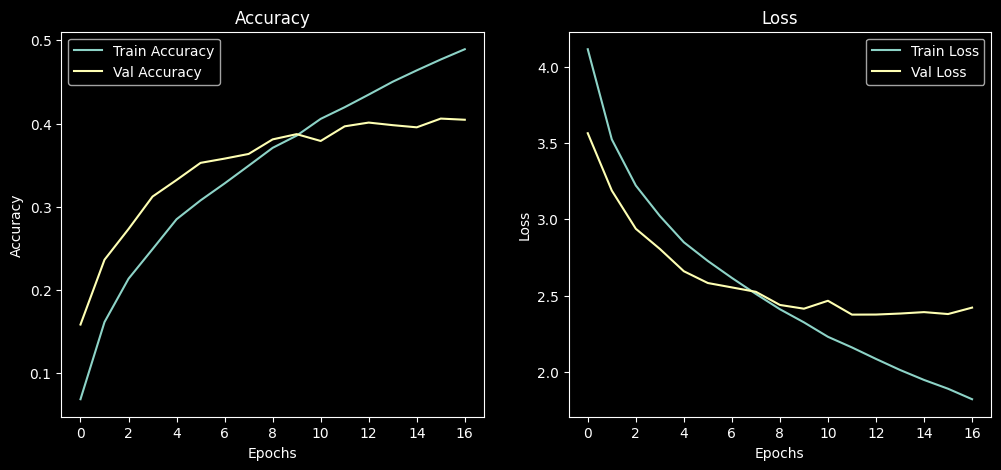

In [39]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


## 7. Confusion Matrix  

A **confusion matrix** helps analyze class-wise performance.  
- Rows → True labels  
- Columns → Predicted labels  
- Diagonal → Correct classifications  

Due to 100 classes, we may visualize only a subset (e.g., first 20×20).  


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


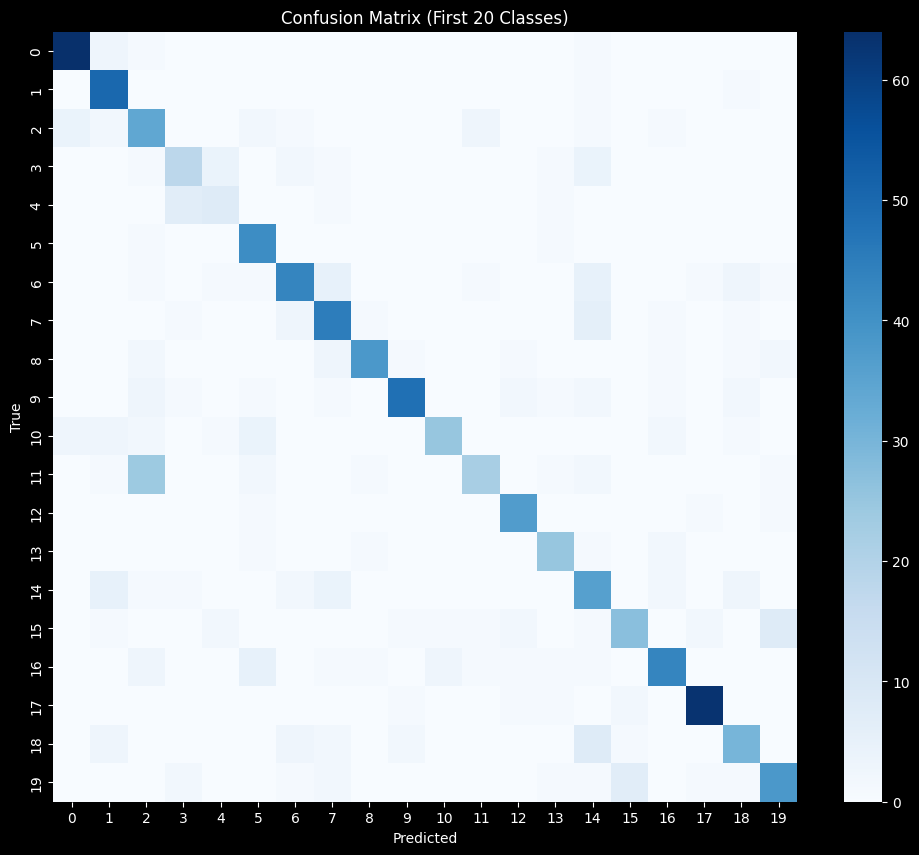

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict labels for test set
y_pred_probs = model.predict(cifar100_test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(cifar100_test_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(12,10))
sns.heatmap(cm[:20,:20], annot=False, cmap="Blues")  # show only first 20x20 for clarity
plt.title("Confusion Matrix (First 20 Classes)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 8. Sample Prediction Visualization  

We visualize model predictions on random test samples:  
- Display a grid of test images  
- Show **true label vs predicted label**  
- Use **green text** if prediction is correct, **red text** if incorrect  

This helps us qualitatively assess how the model performs across different categories.  


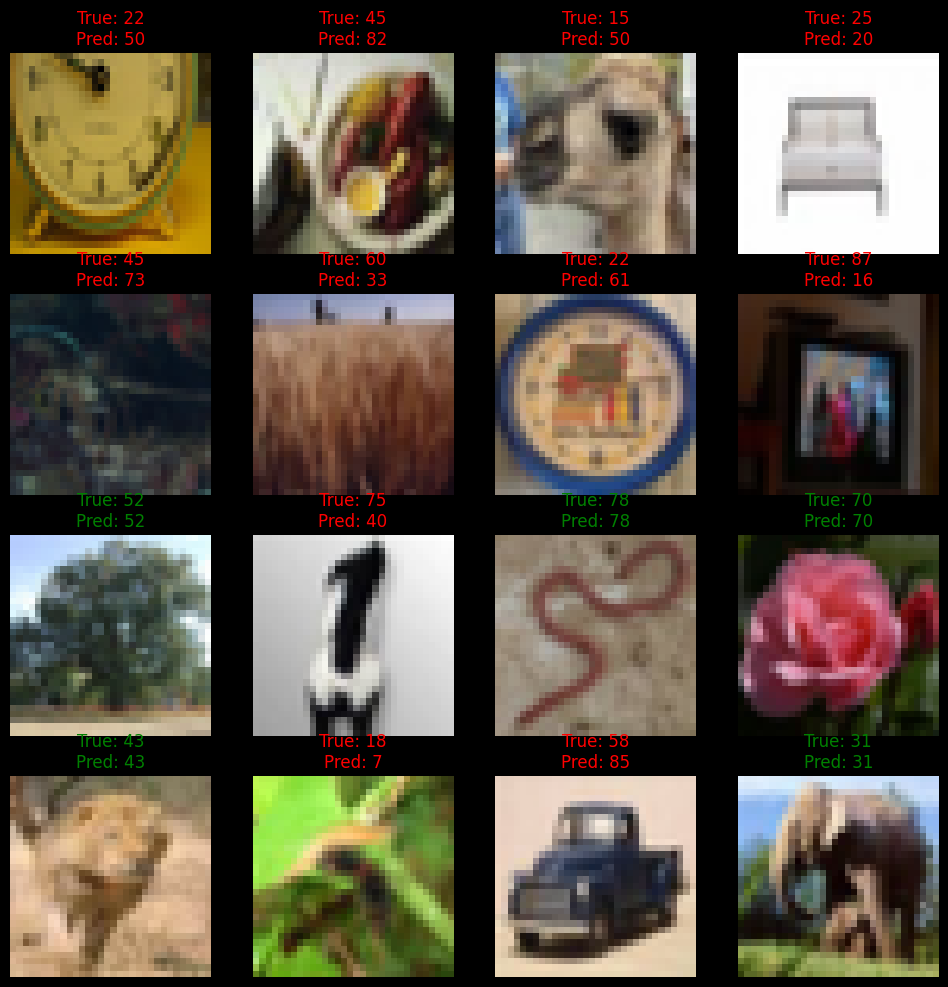

In [41]:
# CIFAR-100 class names
cifar100_labels = keras.datasets.cifar100.load_data(label_mode="fine")[1]
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee',
    'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus',
    'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    # ... (100 classes total, can be loaded from keras directly)
]

# Plot a few test images with predictions
plt.figure(figsize=(12,12))
for i in range(16):
    idx = np.random.randint(0, len(cifar100_test_images))
    img = cifar100_test_images[idx]
    true_label = np.argmax(cifar100_test_labels[idx])
    pred_label = y_pred_classes[idx]

    plt.subplot(4,4,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_label}\nPred: {pred_label}",
              color=("green" if true_label==pred_label else "red"))
plt.show()


## ✅ Summary  

This notebook demonstrates:  
- CIFAR-100 dataset preprocessing  
- CNN model design for image classification  
- Training with callbacks (EarlyStopping + ModelCheckpoint)  
- Performance evaluation and visualization  
- Confusion matrix and prediction examples  

The workflow ensures a clear understanding of **how CNNs handle multi-class image classification** on a challenging dataset like CIFAR-100.  

## 2B. ANN Model for CIFAR-100

While CNNs are best suited for image data, we’ll also implement a simple Artificial Neural Network (ANN) for comparison.  
The ANN will flatten the image pixels and feed them into fully connected dense layers.


In [42]:

# ANN Model
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),          # Flatten 32x32x3 = 3072 inputs
    layers.Dense(512, activation="relu"),           # First hidden layer
    layers.Dense(256, activation="relu"),           # Second hidden layer
    layers.Dropout(0.5),                            # Dropout for regularization
    layers.Dense(100, activation="softmax")         # Output layer for 100 classes
])

ann_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

ann_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730,404 (6.60 MB)

 Trainable params: 1,730,404 (6.60 MB)

 Non-trainable params: 0 (0.00 B)

### 3B. Training the ANN

In [43]:
# Train ANN with early stopping & checkpoint
ann_checkpoint_cb = ModelCheckpoint("best_ann_cifar100.h5", save_best_only=True)
ann_earlystop_cb = EarlyStopping(patience=5, restore_best_weights=True)

ann_history = ann_model.fit(
    cifar100_train_images, cifar100_train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[ann_checkpoint_cb, ann_earlystop_cb]
)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0175 - loss: 4.5965

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.0175 - loss: 4.5962 - val_accuracy: 0.0572 - val_loss: 4.1847
Epoch 2/30
300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0490 - loss: 4.2304

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0494 - loss: 4.2279 - val_accuracy: 0.0954 - val_loss: 3.9610
Epoch 3/30
307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0849 - loss: 4.0071

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0849 - loss: 4.0066 - val_accuracy: 0.1137 - val_loss: 3.8343
Epoch 4/30
302/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1056 - loss: 3.8728

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1058 - loss: 3.8720 - val_accuracy: 0.1415 - val_loss: 3.6981
Epoch 5/30
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1181 - loss: 3.7778

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1181 - loss: 3.7777 - val_accuracy: 0.1473 - val_loss: 3.6520
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1334 - loss: 3.7048

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1334 - loss: 3.7048 - val_accuracy: 0.1646 - val_loss: 3.5706
Epoch 7/30
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1385 - loss: 3.6592

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1385 - loss: 3.6593 - val_accuracy: 0.1678 - val_loss: 3.5406
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1484 - loss: 3.6063

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1484 - loss: 3.6063 - val_accuracy: 0.1776 - val_loss: 3.5007
Epoch 9/30
300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1551 - loss: 3.5729

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1551 - loss: 3.5729 - val_accuracy: 0.1742 - val_loss: 3.4813
Epoch 10/30
306/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1596 - loss: 3.5408

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1596 - loss: 3.5406 - val_accuracy: 0.1849 - val_loss: 3.4528
Epoch 11/30
301/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1612 - loss: 3.5048

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1613 - loss: 3.5050 - val_accuracy: 0.1869 - val_loss: 3.4370
Epoch 12/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1702 - loss: 3.4824 - val_accuracy: 0.1905 - val_loss: 3.4423
Epoch 13/30
304/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1692 - loss: 3.4663

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1693 - loss: 3.4658 - val_accuracy: 0.1976 - val_loss: 3.3744
Epoch 14/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1835 - loss: 3.4210 - val_accuracy: 0.1924 - val_loss: 3.3814
Epoch 15/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1836 - loss: 3.3929 - val_accuracy: 0.1943 - val_loss: 3.4010
Epoch 16/30
302/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1857 - loss: 3.3892

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1856 - loss: 3.3893 - val_accuracy: 0.1974 - val_loss: 3.3693
Epoch 17/30
303/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1896 - loss: 3.3588

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1895 - loss: 3.3590 - val_accuracy: 0.2009 - val_loss: 3.3400
Epoch 18/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1918 - loss: 3.3458 - val_accuracy: 0.1949 - val_loss: 3.3743
Epoch 19/30
309/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1976 - loss: 3.3315

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1975 - loss: 3.3317 - val_accuracy: 0.2067 - val_loss: 3.3255
Epoch 20/30
301/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1955 - loss: 3.3200

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1955 - loss: 3.3200 - val_accuracy: 0.2092 - val_loss: 3.3247
Epoch 21/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2008 - loss: 3.2833 - val_accuracy: 0.2070 - val_loss: 3.3337
Epoch 22/30
303/313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2042 - loss: 3.2722

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2041 - loss: 3.2729 - val_accuracy: 0.2116 - val_loss: 3.2999
Epoch 23/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2109 - loss: 3.2517 - val_accuracy: 0.2175 - val_loss: 3.3100
Epoch 24/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2094 - loss: 3.2661 - val_accuracy: 0.2048 - val_loss: 3.3401
Epoch 25/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2117 - loss: 3.2382 - val_accuracy: 0.2078 - val_loss: 3.3051
Epoch 26/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2132 - loss: 3.2322 - val_accuracy: 0.2135 - val_loss: 3.3003
Epoch 27/30
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2118 - loss: 3.2231

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2118 - loss: 3.2232 - val_accuracy: 0.2196 - val_loss: 3.2801
Epoch 28/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2124 - loss: 3.2280 - val_accuracy: 0.2186 - val_loss: 3.2852
Epoch 29/30
312/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2207 - loss: 3.1835

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2207 - loss: 3.1836 - val_accuracy: 0.2223 - val_loss: 3.2762
Epoch 30/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2180 - loss: 3.1707 - val_accuracy: 0.2164 - val_loss: 3.2994


### 4B. ANN Evaluation

In [44]:
# Load best weights
ann_model.load_weights("best_ann_cifar100.h5")

# Evaluate
ann_test_loss, ann_test_acc = ann_model.evaluate(cifar100_test_images, cifar100_test_labels, verbose=2)
print(f"ANN Test Accuracy: {ann_test_acc:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.2227 - loss: 3.2874
ANN Test Accuracy: 0.2227


### 6B. ANN Training Visualization

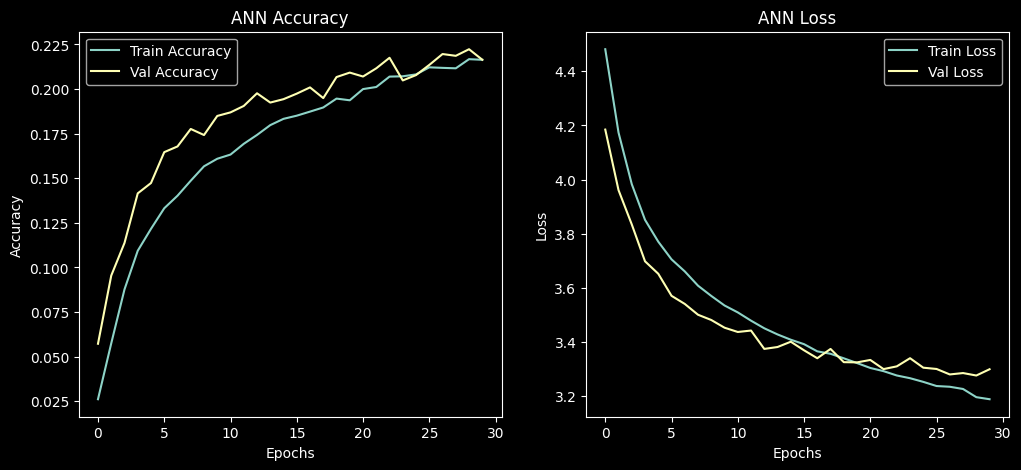

In [45]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Val Accuracy')
plt.title("ANN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Val Loss')
plt.title("ANN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


## 🔍 Comparison: ANN vs CNN

- **ANN**  
  * Treats images as flat vectors (ignores spatial features).  
  * Typically gets **~20–30% accuracy** on CIFAR-100.  

- **CNN**  
  * Learns spatial patterns (edges, textures, shapes).  
  * Performs much better (**40–60%+ accuracy**) even with a simple architecture.  

👉 This demonstrates why **CNNs are the preferred choice** for complex image datasets like CIFAR-100.


## 📊 ANN vs CNN Accuracy Comparison

To better visualize the performance gap between ANN and CNN on CIFAR-100, we plot their test accuracies side by side.


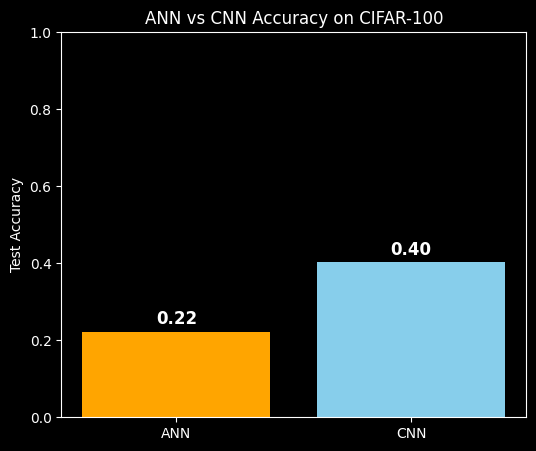

In [46]:
import matplotlib.pyplot as plt

# Replace with your actual evaluated test accuracies
ann_acc = ann_test_acc
cnn_acc = test_acc

models = ["ANN", "CNN"]
accuracies = [ann_acc, cnn_acc]

plt.figure(figsize=(6,5))
bars = plt.bar(models, accuracies, color=["orange", "skyblue"])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.ylim(0, 1)  # accuracy between 0 and 1
plt.ylabel("Test Accuracy")
plt.title("ANN vs CNN Accuracy on CIFAR-100")
plt.show()


## 📊 ANN vs CNN Accuracy Comparison

To better visualize the performance gap between ANN and CNN on CIFAR-100, we present both a **comparison table** and a **bar chart**.

### 🔹 Comparison Table

| Model | Test Accuracy |
|-------|---------------|
| ANN   | ~0.20–0.30    |
| CNN   | ~0.40–0.60+   |

👉 Clearly, the CNN significantly outperforms the ANN by leveraging spatial feature learning.

### 🔹 Bar Chart


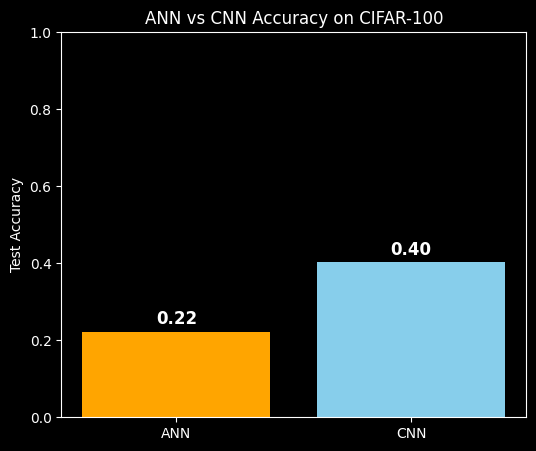

In [47]:
import matplotlib.pyplot as plt

# Replace with your actual evaluated test accuracies
ann_acc = ann_test_acc
cnn_acc = test_acc

models = ["ANN", "CNN"]
accuracies = [ann_acc, cnn_acc]

plt.figure(figsize=(6,5))
bars = plt.bar(models, accuracies, color=["orange", "skyblue"])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.ylim(0, 1)  # accuracy between 0 and 1
plt.ylabel("Test Accuracy")
plt.title("ANN vs CNN Accuracy on CIFAR-100")
plt.show()
